c++ libraries needed:
- `vector.h`
- `eigen`

And for plotting with python:
- `matplotlib`
- `numpy`

To animate, we need the framework:
- `ffmpeg`

The Eigen library only requires to unzip the Eigen folder and it can be downloaded from https://eigen.tuxfamily.org/index.php?title=Main_Page#Download:

```bash
wget -q https://gitlab.com/libeigen/eigen/-/archive/3.4.0/eigen-3.4.0.zip -O eigen-3.4.0.zip
yes All | unzip -q eigen-3.4.0.zip
```

In [1]:
# Plotting functions

import numpy as np
import matplotlib.pyplot as plt


def calculateVorticity2nd(x, y, Vx, Vy):
    dx = x[1] - x[0]
    dy = y[1] - y[0]
    dVydx = (Vy[2:, 1:-1] - Vy[:-2, 1:-1]) / (2 * dx)
    dVxdy = (Vx[1:-1, 2:] - Vx[1:-1, :-2]) / (2 * dy)
    ω = dVydx - dVxdy
    X, Y = np.meshgrid(x[1:-1], y[1:-1])
    return X, Y, ω

# Flat plate


Implementation of Li2016 (article: https://www.sciencedirect.com/science/article/pii/S0021999115006907)

In [2]:
%%bash

g++ D2Q9_IBLB_flat_plate.cpp -O3
time ./a.out


real	1m58.149s
user	1m56.807s
sys	0m0.889s


In [3]:
Lx = 720 // 2
Ly = 540 // 2
data = np.loadtxt("data_flat_plate.dat")
Ndata = Lx * Ly

data1 = data[:Ndata]
data2 = data[Ndata : 2 * Ndata]
data3 = data[2 * Ndata :]

data1 = data1.reshape((Lx, Ly, 4))
data2 = data2.reshape((Lx, Ly, 4))
data3 = data3.reshape((Lx, Ly, 4))

x0 = int(Lx / 5)
y0 = int(Ly / 4)
yf = Ly - int(Ly / 4)
x, y = data1[x0:, 0, 0], data1[0, y0:yf, 1]
X0, Y0 = np.meshgrid(x, y)

Vx1, Vy1 = data1[x0:, y0:yf, 2], data1[x0:, y0:yf, 3]
Vx2, Vy2 = data2[x0:, y0:yf, 2], data2[x0:, y0:yf, 3]
Vx3, Vy3 = data3[x0:, y0:yf, 2], data3[x0:, y0:yf, 3]

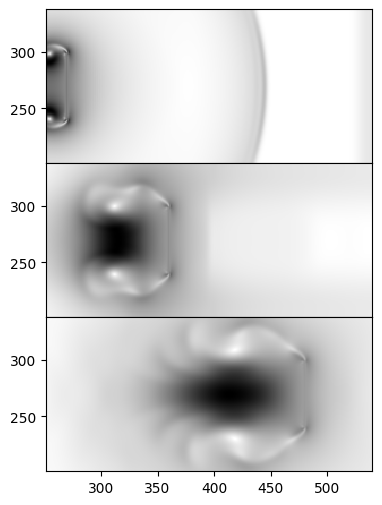

In [4]:
V1 = np.sqrt(Vx1**2 + Vy1**2)
V2 = np.sqrt(Vx2**2 + Vy2**2)
V3 = np.sqrt(Vx3**2 + Vy3**2)

fig, ax = plt.subplots(3, 1, sharex=True, figsize=(12, 6))
c0 = ax[0].pcolormesh(X0, Y0, V1.T, cmap="binary")  # contourf,pcolormesh
c1 = ax[1].pcolormesh(X0, Y0, V2.T, cmap="binary")  # contourf,pcolormesh
c2 = ax[2].pcolormesh(X0, Y0, V3.T, cmap="binary")  # contourf,pcolormesh
ax[0].set_aspect("equal")
ax[1].set_aspect("equal")
ax[2].set_aspect("equal")
plt.subplots_adjust(hspace=0)

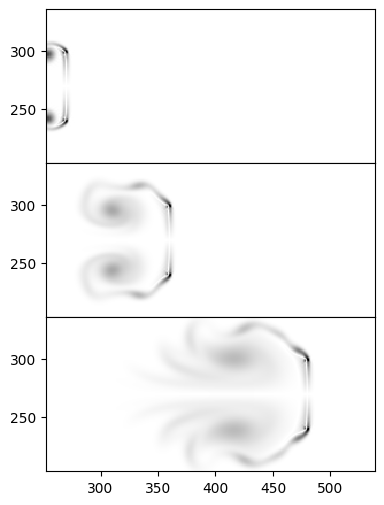

In [5]:
X, Y, ω1 = calculateVorticity2nd(x, y, Vx1, Vy1)
X, Y, ω2 = calculateVorticity2nd(x, y, Vx2, Vy2)
X, Y, ω3 = calculateVorticity2nd(x, y, Vx3, Vy3)

fig, ax = plt.subplots(3, 1, sharex=True, figsize=(12, 6))
c0 = ax[0].pcolormesh(X, Y, np.abs(ω1).T, cmap="binary")  # contourf,pcolormesh
c1 = ax[1].pcolormesh(X, Y, np.abs(ω2).T, cmap="binary")  # contourf,pcolormesh
c2 = ax[2].pcolormesh(X, Y, np.abs(ω3).T, cmap="binary")  # contourf,pcolormesh
ax[0].set_aspect("equal")
ax[1].set_aspect("equal")
ax[2].set_aspect("equal")
plt.subplots_adjust(hspace=0)

# Cylinder

In [6]:
%%bash

g++ D2Q9_IBLB_cylinder.cpp -O3
time ./a.out


real	1m22.077s
user	1m21.109s
sys	0m0.439s


In [7]:
Lx = 200
Ly = 100
data = np.loadtxt("data_cylinder.dat")
data = data.reshape((Lx, Ly, 4))
x0 = 0
x, y = data[x0:, 0, 0], data[0, :, 1]
X0, Y0 = np.meshgrid(x, y)
Vx, Vy = data[x0:, :, 2], data[x0:, :, 3]
V = np.sqrt(Vx**2 + Vy**2)

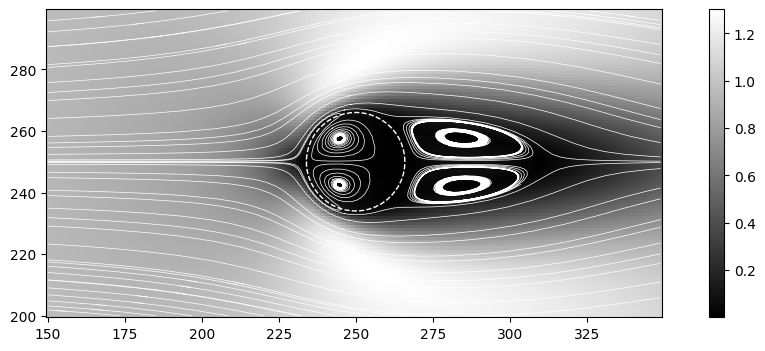

In [8]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.streamplot(
    X0,
    Y0,
    Vx.T,
    Vy.T,
    density=0.6,
    color="w",
    linewidth=0.5,
    arrowsize=0.1,
    broken_streamlines=False,
)
r0 = [250, 250]
R = 16
theta = np.linspace(0, 2 * np.pi, 50)
c = ax.pcolormesh(X0, Y0, V.T, cmap="binary_r")
ax.plot(r0[0] + R * np.cos(theta), r0[1] + R * np.sin(theta), "w--", lw=1)
ax.set_aspect("equal")
fig.colorbar(c, ax=ax)

# Simple sphere falling in a fluid

In [9]:
%%bash

g++ D2Q9_IBLB_simple.cpp -O3
time ./a.out


real	0m35.677s
user	0m34.880s
sys	0m0.380s


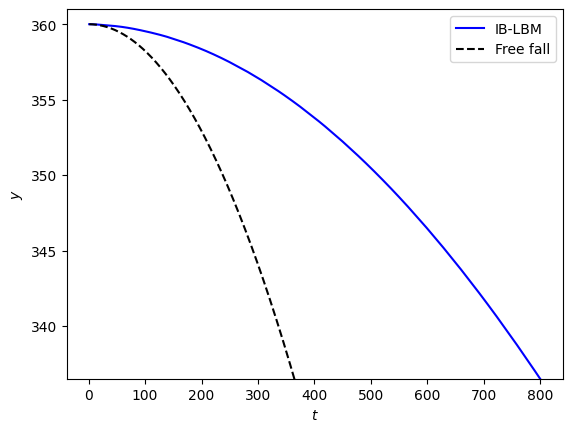

In [10]:
data = np.loadtxt("data_simple.dat")
t, xt, yt = data[:, 0], data[:, 1], data[:, 2]

vy0, gy = -3.53678e-06, -0.000353678
tmax = 800
fig, ax = plt.subplots()
ax.plot(t[:tmax], yt[:tmax], "b-", label="IB-LBM")
ax.plot(
    t[:tmax],
    yt[0] - vy0 * t[:tmax] + 0.5 * gy * t[:tmax] ** 2,
    "k--",
    label="Free fall",
)
ax.set_ylim([yt[tmax - 1], 1 + yt[0]])
ax.set_xlabel(r"$t$")
ax.set_ylabel(r"$y$")
plt.legend()

In [11]:
Lx = 540 // 2
Ly = 720 // 2
data = np.loadtxt("data_fluid_simple.dat")
data = data.reshape((Lx, Ly, 4))
x0 = 0
x, y = data[x0:, 0, 0], data[0, :, 1]
X0, Y0 = np.meshgrid(x, y)
Vx, Vy = data[x0:, :, 2], data[x0:, :, 3]

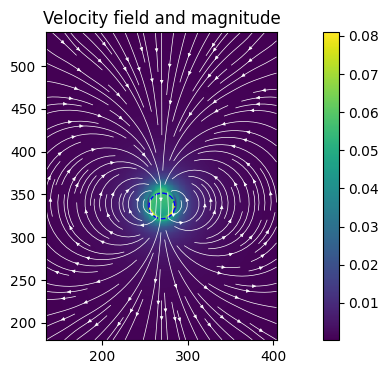

In [12]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.set_aspect("equal")

r0 = [xt[-1], yt[-1]]
R = 15
theta = np.linspace(0, 2 * np.pi, 50)
ax.plot(r0[0] + R * np.cos(theta), r0[1] + R * np.sin(theta), "b--", lw=1)
ax.set_title("Velocity field and magnitude")
V = np.sqrt(Vx**2 + Vy**2)
c = ax.pcolormesh(X0, Y0, V.T, cmap="viridis")
fig.colorbar(c, ax=ax)

ax.streamplot(X0, Y0, Vx.T, Vy.T, density=1.3, color="w", linewidth=0.5, arrowsize=0.5)

# Two spheres falling with rotations

In [13]:
%%bash

g++ D2Q9_IBLB_two_spheres.cpp -O3
time ./a.out

 --------------- SIMULATION STARTED ----------------
Simulation parameters:
Lx:	600
Ly:	1800
R:	50
Nm:	60
g:	-0.00096
tmax:	15000
t = 0
t = 100
t = 200
t = 300
t = 400
t = 500
t = 600
t = 700
t = 800
t = 900
t = 1000
t = 1100
t = 1200
t = 1300
t = 1400
t = 1500
t = 1600
t = 1700
t = 1800
t = 1900
t = 2000
t = 2100
t = 2200
t = 2300
t = 2400
t = 2500
t = 2600
t = 2700
t = 2800
t = 2900
t = 3000
t = 3100
t = 3200
t = 3300
t = 3400
t = 3500
t = 3600
t = 3700
t = 3800
t = 3900
t = 4000
t = 4100
t = 4200
t = 4300
t = 4400
t = 4500
t = 4600
t = 4700
t = 4800
t = 4900
t = 5000
t = 5100
t = 5200
t = 5300
t = 5400
t = 5500
t = 5600
t = 5700
t = 5800
t = 5900
t = 6000
t = 6100
t = 6200
t = 6300
t = 6400
t = 6500
t = 6600
t = 6700
t = 6800
t = 6900
t = 7000
t = 7100
t = 7200
t = 7300
t = 7400
t = 7500
t = 7600
t = 7700
t = 7800
t = 7900
t = 8000
t = 8100
t = 8200
t = 8300
t = 8400
t = 8500
t = 8600
t = 8700
t = 8800
t = 8900
t = 9000
t = 9100
t = 9200
t = 9300
t = 9400
t = 9500
t = 9600
t = 9700



real	64m32.480s
user	53m30.055s
sys	0m27.178s


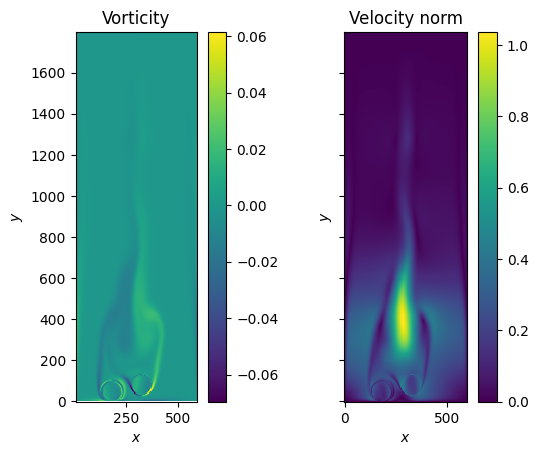

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, ArtistAnimation

plt.rcParams["animation.html"] = "html5"
plt.rcParams["figure.dpi"] = 100

Lx = 600 // 5  # Domain every 5 points
Ly = 1800 // 5

data = np.loadtxt("data_fluid_two_spheres.dat")
data = data.reshape(
    (
        -1,
        Lx,
        Ly,
        4,
    )
)
x0 = 0
x, y = data[0, x0:, 0, 0], data[0, 0, :, 1]
X0, Y0 = np.meshgrid(x, y)

Nframes = data.shape[0]

fig, ax = plt.subplots(1, 2, sharey=True)

X, Y, ω = calculateVorticity2nd(x, y, data[0, x0:, :, 2], data[0, x0:, :, 3])
V0 = np.sqrt(data[0, x0:, :, 2] ** 2 + data[0, x0:, :, 3] ** 2)

fluid_omega = ax[0].pcolormesh(X, Y, ω.T, cmap="viridis")
fluid_v = ax[1].pcolormesh(X0, Y0, V0.T, cmap="viridis")
cb1 = fig.colorbar(fluid_omega, ax=ax[0])
cb2 = fig.colorbar(fluid_v, ax=ax[1])

titles = ["Vorticity", "Velocity norm"]
for i in range(2):
    ax[i].set_title(titles[i])
    ax[i].set_xlabel(r"$x$")
    ax[i].set_ylabel(r"$y$")
    ax[i].set_aspect("equal")


def init():
    return []


def animate(t):
    X, Y, ω = calculateVorticity2nd(x, y, data[t, x0:, :, 2], data[t, x0:, :, 3])
    V0 = np.sqrt(data[t, x0:, :, 2] ** 2 + data[t, x0:, :, 3] ** 2)
    fluid_omega = ax[0].pcolormesh(X, Y, ω.T, cmap="viridis")
    fluid_v = ax[1].pcolormesh(X0, Y0, V0.T, cmap="viridis")
    cb1.update_normal(fluid_omega)
    cb2.update_normal(fluid_v)
    return (fluid_omega, fluid_v)


anim = FuncAnimation(
    fig, animate, init_func=init, frames=Nframes, interval=80, blit=True
)
anim